### Claude Shyaka
### ID#: 801326243
# Homework 5: Gradient Descent, Backpropagation, and ANN

### Prob 1

In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
# Temperature meaurements
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])

In [3]:
def model(t_u, w_2, w_1, b):
    return w_2*t_u**2 + w_1*t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples, generator=torch.Generator().manual_seed(42))

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # <1>

(tensor([ 6,  8,  9,  2,  1, 10,  0,  7,  3]), tensor([5, 4]))

In [6]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [7]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): # <1>
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False # <2>
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
    return params
    

In [8]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [9]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 700.8784, Validation loss 562.9166
Epoch 2, Training loss 400.5066, Validation loss 339.8012
Epoch 3, Training loss 231.7319, Validation loss 209.3004
Epoch 500, Training loss 11.9179, Validation loss 4.7955
Epoch 1000, Training loss 9.5623, Validation loss 3.3341
Epoch 1500, Training loss 7.9316, Validation loss 2.3322
Epoch 2000, Training loss 6.8021, Validation loss 1.6464
Epoch 2500, Training loss 6.0192, Validation loss 1.1780
Epoch 3000, Training loss 5.4761, Validation loss 0.8588
Epoch 3500, Training loss 5.0987, Validation loss 0.6419
Epoch 4000, Training loss 4.8360, Validation loss 0.4951
Epoch 4500, Training loss 4.6525, Validation loss 0.3961
Epoch 5000, Training loss 4.5239, Validation loss 0.3298


tensor([ 0.5676, -0.9301, -0.9460], requires_grad=True)

In [10]:
# Linear Model
def model_ln(t_u, w, b):
    return w * t_u + b

# Training Loop for the linear model
def training_loop_ln(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model_ln(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad():
            val_t_p = model_ln(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
    return params


In [11]:
params_ln = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate_ln = 1e-2
optimizer_ln = optim.SGD([params_ln], lr=learning_rate_ln)

training_loop_ln(
    n_epochs = 5000, 
    optimizer = optimizer_ln,
    params = params_ln,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 93.9443, Validation loss 19.2545
Epoch 2, Training loss 43.2299, Validation loss 0.7752
Epoch 3, Training loss 35.5362, Validation loss 4.8714
Epoch 500, Training loss 7.1039, Validation loss 5.2108
Epoch 1000, Training loss 3.5098, Validation loss 3.8908
Epoch 1500, Training loss 3.0399, Validation loss 3.5031
Epoch 2000, Training loss 2.9784, Validation loss 3.3746
Epoch 2500, Training loss 2.9704, Validation loss 3.3296
Epoch 3000, Training loss 2.9693, Validation loss 3.3136
Epoch 3500, Training loss 2.9692, Validation loss 3.3078
Epoch 4000, Training loss 2.9692, Validation loss 3.3057
Epoch 4500, Training loss 2.9692, Validation loss 3.3050
Epoch 5000, Training loss 2.9692, Validation loss 3.3047


tensor([  5.3904, -17.1041], requires_grad=True)

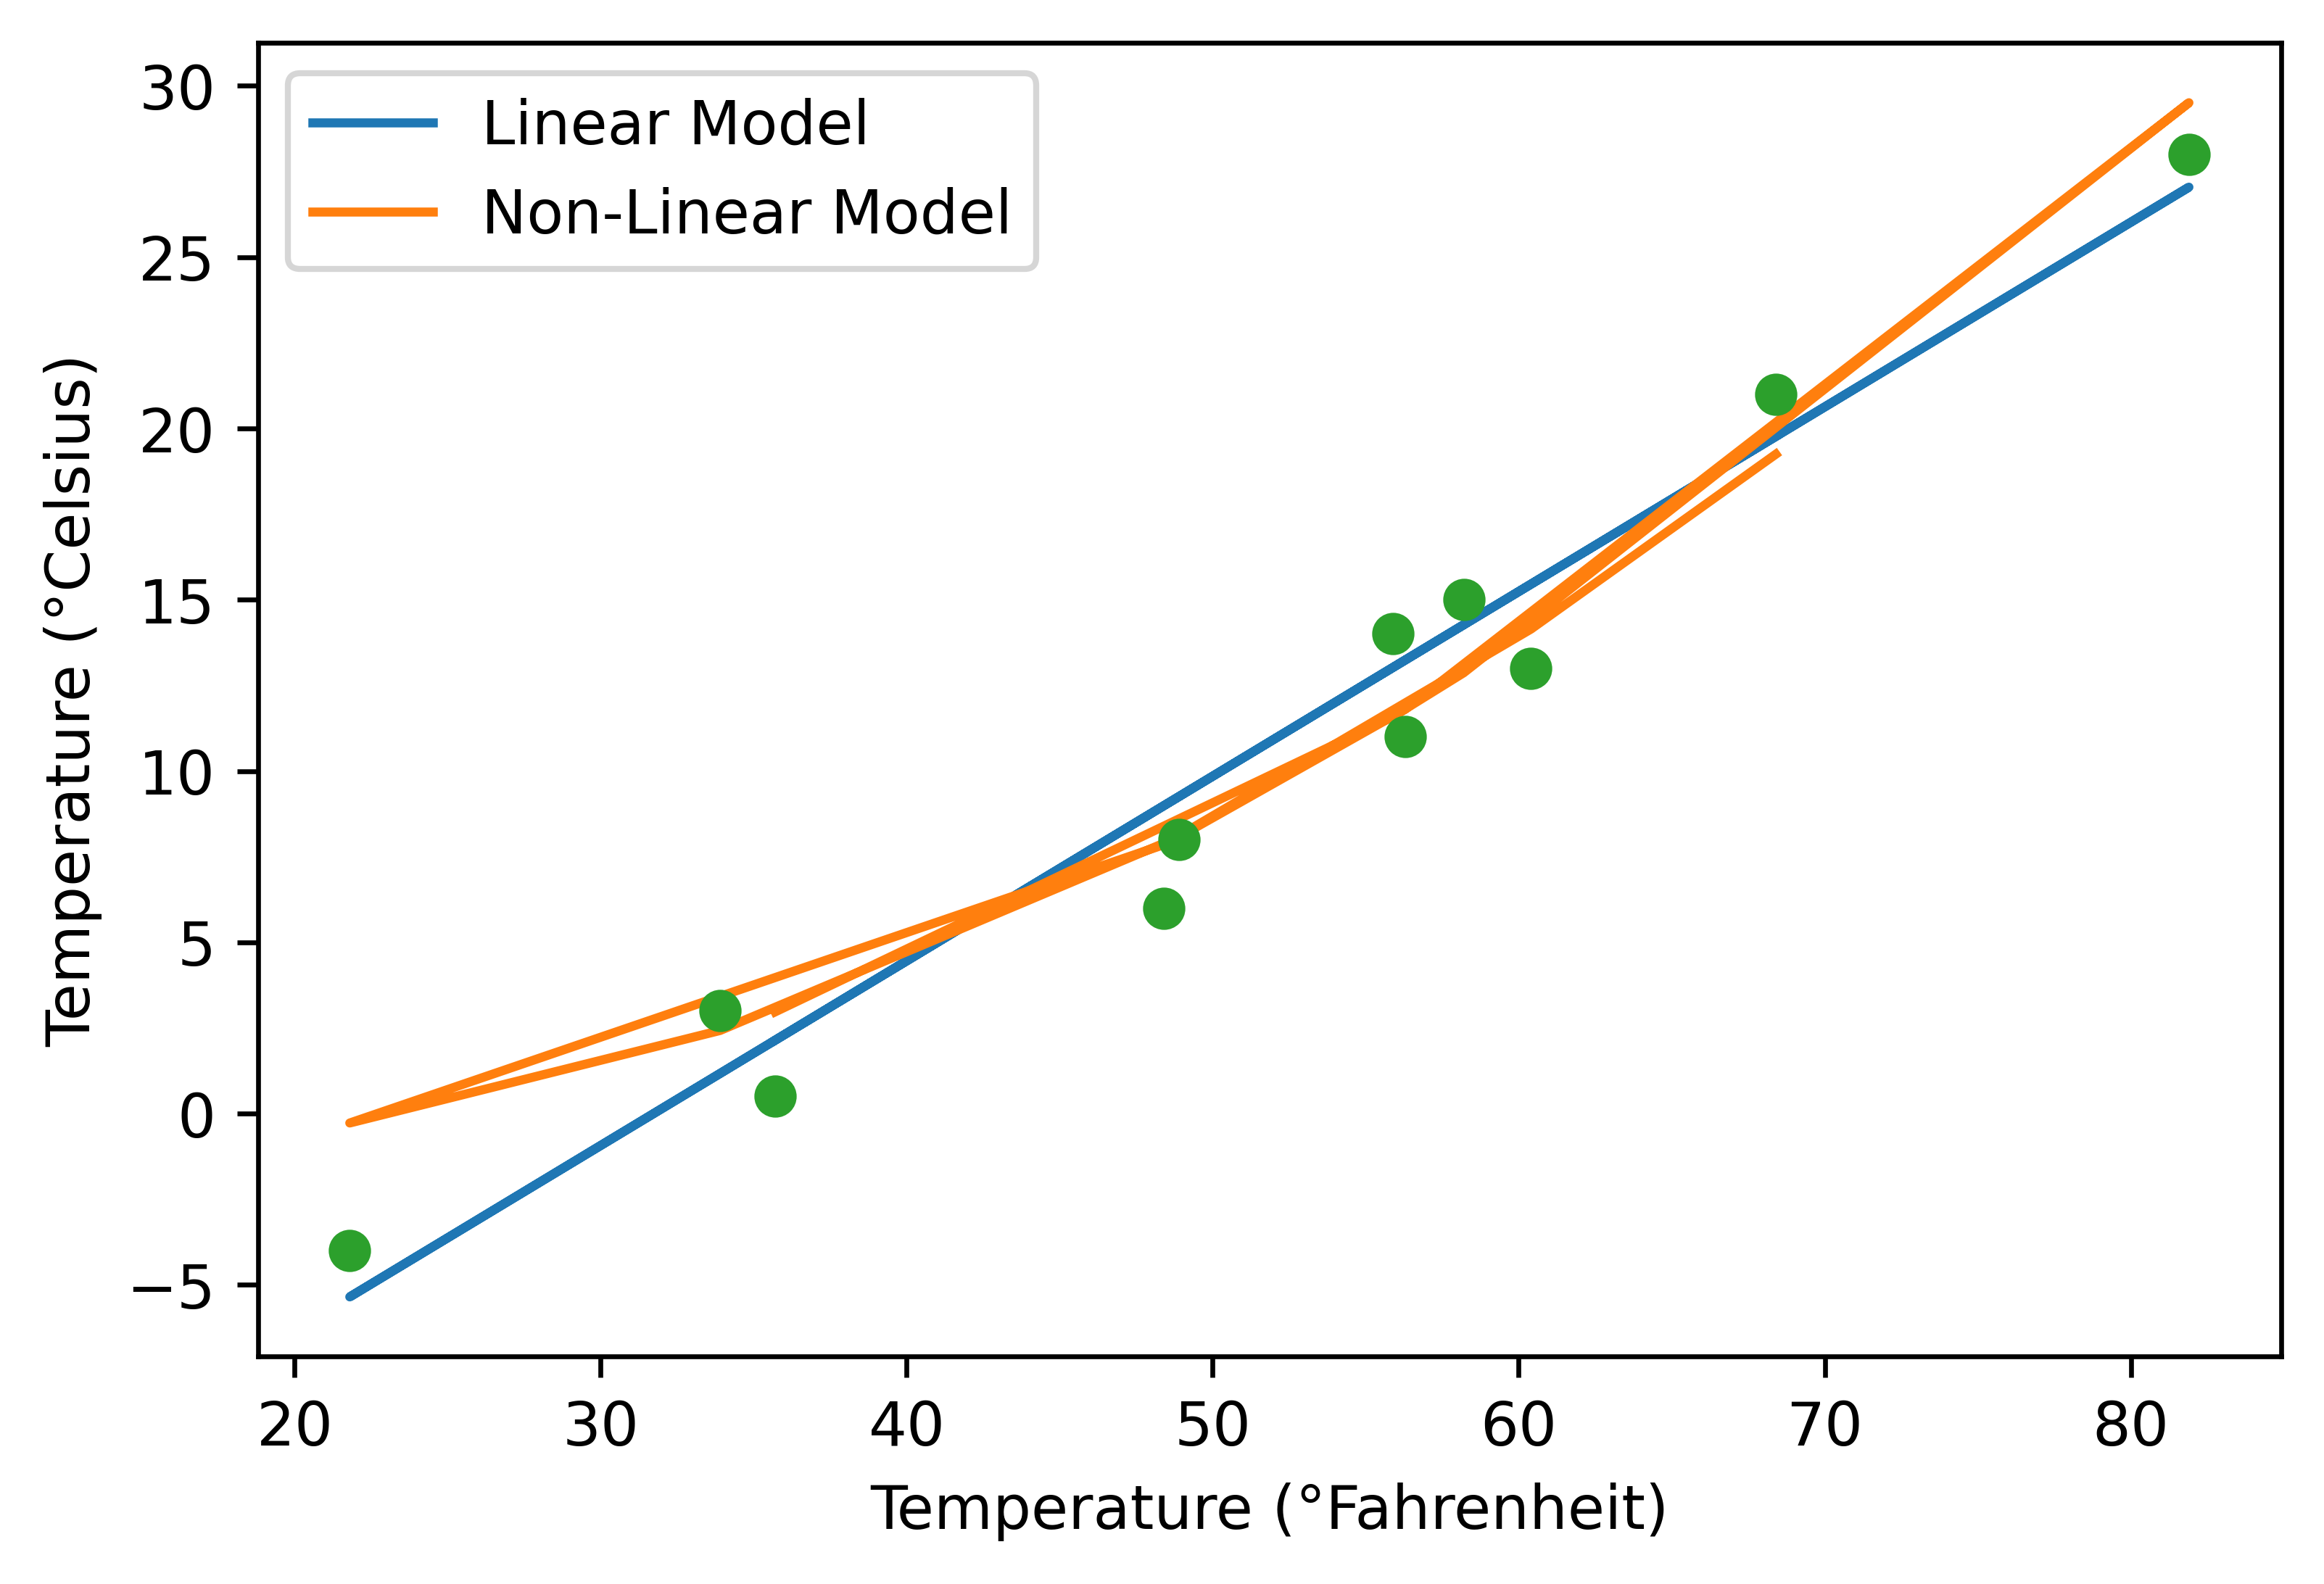

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

t_un = 0.1 * t_u
t_p_ln = model_ln(t_un, *params_ln)
t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p_ln.detach().numpy(), label="Linear Model")
plt.plot(t_u.numpy(), t_p.detach().numpy(), label="Non-Linear Model")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.legend()
plt.savefig("temp_unknown_plot.png", format="png")

### Prob 2

In [13]:
import pandas as pd
import numpy as np
import torch
import torch.optim as optim

from sklearn.preprocessing import MinMaxScaler

# Seed for random state
seed = 42
torch.manual_seed(seed)

# Load housing dataset
housing_dataset = pd.read_csv('../../data/Housing.csv', delimiter=',')

# Prepare the dataset.

# List of variable to map to numerical values.
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing_dataset[varlist] = housing_dataset[varlist].apply(binary_map)

# preview the dataset
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [14]:
# Extract the desired features
filter = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

housing_filtered = housing_dataset[filter]
housing_filtered.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [15]:
# array of data
data = housing_filtered.values
data.shape

(545, 6)

In [16]:
# Generate random indices for training and validation data.
n_samples = data.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

# Transform data to a tensor
torch_data = torch.tensor(data, dtype=torch.double)

# Filter the train and val subsets from the dataset
torch_train_data = torch_data[train_indices]
torch_val_data = torch_data[val_indices]

In [17]:
# Convert train and val tensors to numpy arrays
np_train_data = torch_train_data.numpy()
np_val_data = torch_val_data.numpy()
print(np_train_data.shape)
print(np_val_data.shape)

# Normalize the train and val subsets using the MinMaxScaler
sc_nn_2 =  MinMaxScaler()
t_n_train = torch.from_numpy(sc_nn_2.fit_transform(np_train_data))
t_n_val = torch.from_numpy(sc_nn_2.transform(np_val_data))

(436, 6)
(109, 6)


In [18]:
# Filter features and targets for training and validation.
t_un_train = t_n_train[:, :-1]
t_cn_train = t_n_train[:, -1].unsqueeze(1)

t_un_val = t_n_val[:, :-1]
t_cn_val = t_n_val[:, -1].unsqueeze(1)

t_un_train.shape, t_cn_train.shape, t_un_val.shape, t_cn_val.shape

(torch.Size([436, 5]),
 torch.Size([436, 1]),
 torch.Size([109, 5]),
 torch.Size([109, 1]))

In [19]:
def model(t_u, w):
    m = t_u.shape[0]
    t_u_0 = torch.ones(m, 1, dtype=torch.double)
    t_u = torch.hstack((t_u, t_u_0))
    w = w.unsqueeze(1)

    return torch.mm(t_u, w)

In [20]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [21]:
loss_train_list = []
loss_val_list = []
epochs_list = []
def training_loop_2(n_epochs, optimizer, params, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(t_u_train, params)
        loss_train = loss_fn(train_t_p, t_c_train)

        with torch.no_grad():
            t_p_val = model(t_u_val, params)
            loss_val = loss_fn(t_p_val, t_c_val)
            assert loss_val.requires_grad == False # <2>
            
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
            loss_train_list.append(loss_train.item())
            loss_val_list.append(loss_val.item())
            epochs_list.append(epoch)
    return params

In [22]:
# learning_rate_list = [0.1, 0.01, 0.001, 0.0001]
# for l_rate in learning_rate_list:
#     print("\n\nFor Learning rate: ", l_rate)
#     params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True, dtype=torch.double)
#     optimizer = optim.SGD([params], lr=l_rate)

#     training_loop(
#         n_epochs = 5000, 
#         optimizer = optimizer,
#         params = params,
#         t_u_train = t_un_train,
#         t_u_val = t_un_val, 
#         t_c_train = t_cn_train,
#         t_c_val = t_cn_val)

In [23]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True, dtype=torch.double)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop_2(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_cn_train,
    t_c_val = t_cn_val)


Epoch 1, Training loss 1.2075, Validation loss 1.2233
Epoch 2, Training loss 0.7233, Validation loss 0.7211
Epoch 3, Training loss 0.4640, Validation loss 0.4505
Epoch 500, Training loss 0.0122, Validation loss 0.0096
Epoch 1000, Training loss 0.0119, Validation loss 0.0098
Epoch 1500, Training loss 0.0119, Validation loss 0.0099
Epoch 2000, Training loss 0.0119, Validation loss 0.0099
Epoch 2500, Training loss 0.0119, Validation loss 0.0099
Epoch 3000, Training loss 0.0119, Validation loss 0.0099
Epoch 3500, Training loss 0.0119, Validation loss 0.0099
Epoch 4000, Training loss 0.0119, Validation loss 0.0099
Epoch 4500, Training loss 0.0119, Validation loss 0.0099
Epoch 5000, Training loss 0.0119, Validation loss 0.0099


tensor([0.4387, 0.0323, 0.2962, 0.1431, 0.1011, 0.0587],
       dtype=torch.float64, requires_grad=True)

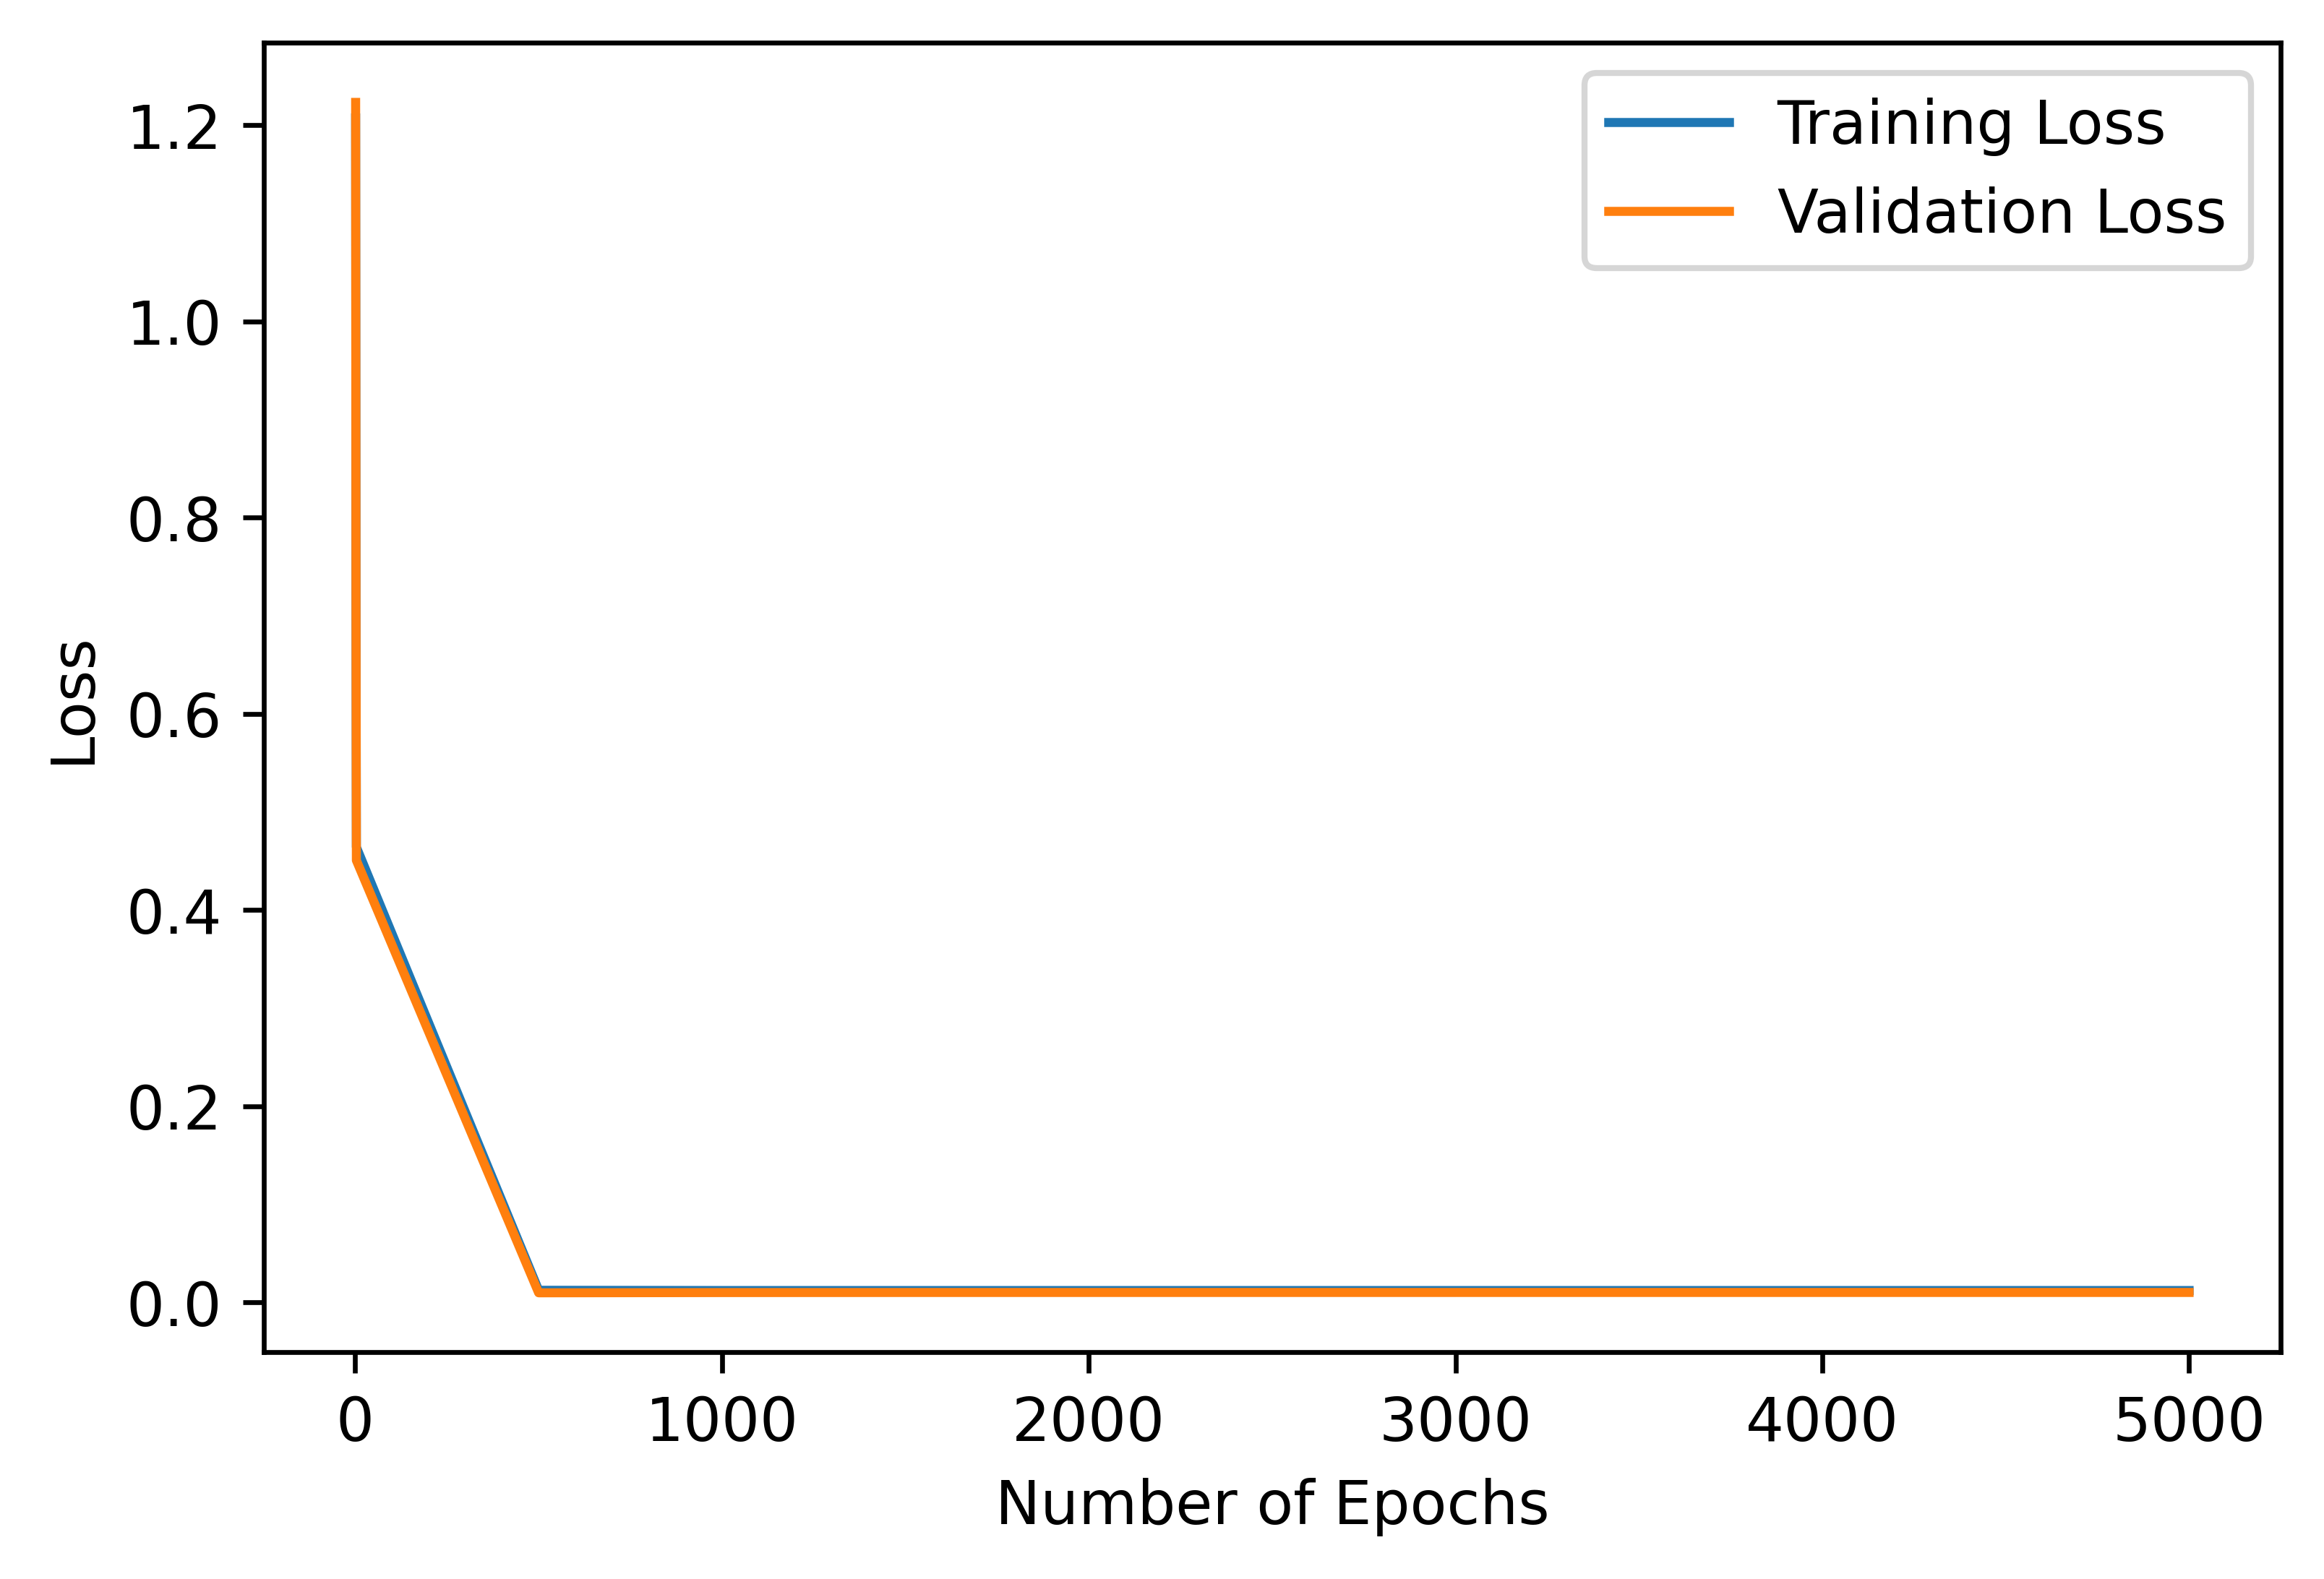

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(epochs_list, loss_train_list, label="Training Loss")
plt.plot(epochs_list, loss_val_list, label="Validation Loss")
plt.legend()
plt.savefig("temp_unknown_plot.png", format="png")